<a href="https://www.kaggle.com/code/moazawadali/rnn-for-next-word-prediction?scriptVersionId=236704453" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

2025-04-28 23:04:06.426549: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745881446.693827      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745881446.772658      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
text = """
once upon a time there was a little girl who lived in a village near the forest
she liked to wear a red coat with a hood that her grandmother had made for her
everyone in the village called her little red riding hood one morning her mother asked
her to visit grandmother who lived in the forest but warned her not to talk to strangers
on her way little red riding hood met a wolf who asked where she was going
the girl told the wolf about her grandmother who lived alone in the forest
the wolf ran ahead to the grandmother house and pretended to be the little girl
when little red riding hood arrived the wolf was waiting in the bed disguised as grandmother
little red riding hood noticed something strange about her grandmother and said what big eyes you have
the wolf replied all the better to see you with my dear
"""

In [5]:
text = text.lower().replace('\n', ' ')
words = [word for word in text.split() if word.isalnum()]

print(f"Total words in the corpus: {len(words)}")
print(f"First 10 words: {words[:10]}")

Total words in the corpus: 156
First 10 words: ['once', 'upon', 'a', 'time', 'there', 'was', 'a', 'little', 'girl', 'who']


In [6]:
sequences = []
for i in range(len(words) - 3):
    sequences.append(words[i:i+4])

print(f"Number of sequences: {len(sequences)}")
print(f"First 3 sequences: {sequences[:3]}")

Number of sequences: 153
First 3 sequences: [['once', 'upon', 'a', 'time'], ['upon', 'a', 'time', 'there'], ['a', 'time', 'there', 'was']]


In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([' '.join(words)])
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1  # +1 for the padding token

print(f"Vocabulary size: {vocab_size}")
print(f"Sample from vocabulary: {list(word_index.items())[:5]}")

Vocabulary size: 79
Sample from vocabulary: [('the', 1), ('her', 2), ('to', 3), ('a', 4), ('little', 5)]


In [8]:
X = []  # input sequences (first 3 words)
y = []  # target word (4th word)

for seq in sequences:
    X.append(seq[:3])
    y.append(seq[3])

print(f"X shape: {len(X)} sequences of length 3")
print(f"y shape: {len(y)} words")
print(f"Sample X: {X[:3]}")
print(f"Sample y: {y[:3]}")

X shape: 153 sequences of length 3
y shape: 153 words
Sample X: [['once', 'upon', 'a'], ['upon', 'a', 'time'], ['a', 'time', 'there']]
Sample y: ['time', 'there', 'was']


In [9]:
X_seq = tokenizer.texts_to_sequences([' '.join(seq) for seq in X])
y_seq = tokenizer.texts_to_sequences([word for word in y])

In [10]:
y_seq = [item[0] for item in y_seq]

print(f"First 3 X sequences (encoded): {X_seq[:3]}")
print(f"First 3 y values (encoded): {y_seq[:3]}")

First 3 X sequences (encoded): [[24, 25, 4], [25, 4, 26], [4, 26, 27]]
First 3 y values (encoded): [26, 27, 13]


In [11]:
X_array = np.array(X_seq)
y_array = np.array(y_seq)

print(f"X shape: {X_array.shape}")
print(f"y shape: {y_array.shape}")

X shape: (153, 3)
y shape: (153,)


In [12]:
y_one_hot = tf.keras.utils.to_categorical(y_array, num_classes=vocab_size)
print(f"y one-hot shape: {y_one_hot.shape}")

y one-hot shape: (153, 79)


In [13]:
embedding_dim = 50
lstm_units = 100

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=3),
    LSTM(units=lstm_units),
    Dense(units=vocab_size, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1745881461.481400      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745881461.482038      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(
    X_array, y_one_hot,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100


I0000 00:00:1745881465.501248      63 cuda_dnn.cc:529] Loaded cuDNN version 90300


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.0299 - loss: 4.3682 - val_accuracy: 0.0323 - val_loss: 4.3679
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1413 - loss: 4.3594 - val_accuracy: 0.0323 - val_loss: 4.3669
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1075 - loss: 4.3514 - val_accuracy: 0.0323 - val_loss: 4.3662
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1060 - loss: 4.3417 - val_accuracy: 0.0645 - val_loss: 4.3657
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1059 - loss: 4.3288 - val_accuracy: 0.0645 - val_loss: 4.3651
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0861 - loss: 4.3141 - val_accuracy: 0.0645 - val_loss: 4.3646
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1027 - loss: 4.2929 - val_accuracy: 0.0645 - val_loss: 4.3642
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0829 - loss: 4.2716 - val_accuracy: 0.0645 - val_loss: 4.3646
Epo

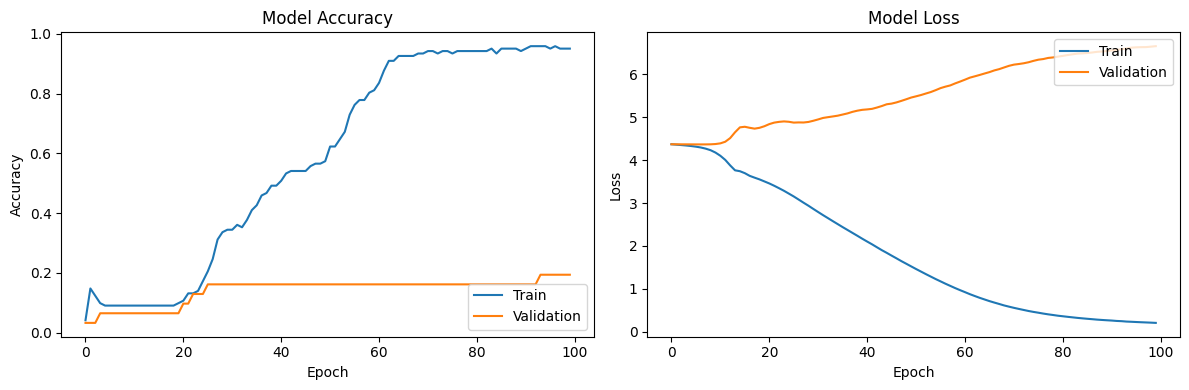

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [16]:
def predict_next_word(input_text):
    # Clean and tokenize the input text
    words = input_text.lower().split()
    
    # Check if we have exactly 3 words
    if len(words) != 3:
        return "Please provide exactly 3 words as input."
    
    # Check if all words are in the vocabulary
    for word in words:
        if word not in word_index:
            return f"Word '{word}' is not in the vocabulary. Please try another word."
    
    # Convert to sequence
    seq = tokenizer.texts_to_sequences([input_text])[0]
    
    # Make prediction
    prediction = model.predict(np.array([seq]))
    predicted_index = np.argmax(prediction)
    
    # Get the word from the index
    for word, index in word_index.items():
        if index == predicted_index:
            return word
    
    return "Could not find the predicted word in the vocabulary."

In [17]:
test_inputs = [
    "once upon a",
    "little red riding",
    "in the forest",
    "she liked to"
]

for input_text in test_inputs:
    predicted_word = predict_next_word(input_text)
    print(f"Input: '{input_text}'")
    print(f"Predicted next word: '{predicted_word}'")
    print(f"Complete sequence: '{input_text} {predicted_word}'")
    print("-" * 50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Input: 'once upon a'
Predicted next word: 'time'
Complete sequence: 'once upon a time'
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Input: 'little red riding'
Predicted next word: 'hood'
Complete sequence: 'little red riding hood'
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Input: 'in the forest'
Predicted next word: 'but'
Complete sequence: 'in the forest but'
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Input: 'she liked to'
Predicted next word: 'wear'
Complete sequence: 'she liked to wear'
--------------------------------------------------


In [18]:
user_input = "girl told the"
predicted_word = predict_next_word(user_input)
print(f"Predicted next word: '{predicted_word}'")
print(f"Complete sequence: '{user_input} {predicted_word}'")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted next word: 'wolf'
Complete sequence: 'girl told the wolf'
